<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1227_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib

# video 조지기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
video_path = glob('/gdrive/My Drive/kangwon_football/*')[0]
text_path = glob('/gdrive/My Drive/kangwon_football/*')[1]
video_path, text_path

('/gdrive/My Drive/kangwon_football/2020-12-27 15-03-55.mp4',
 '/gdrive/My Drive/kangwon_football/2020-12-27 15-03-55.txt')

In [ ]:
df = pd.read_csv(text_path, header=None)
df

,0,1,2,3,4,5,6
0,0,person,0,483,234,164,473
1,0,person,1,803,197,222,598
2,1,person,0,477,228,164,473
3,1,person,1,816,195,222,598
4,2,person,0,470,228,164,473
...,...,...,...,...,...,...,...
351,175,person,1,1383,20,270,727
352,176,person,0,209,125,172,497
353,176,person,1,1411,16,270,727
354,177,person,0,210,126,172,497


In [ ]:
df = df.drop(1,axis=1)
df

,0,2,3,4,5,6
0,0,0,483,234,164,473
1,0,1,803,197,222,598
2,1,0,477,228,164,473
3,1,1,816,195,222,598
4,2,0,470,228,164,473
...,...,...,...,...,...,...
351,175,1,1383,20,270,727
352,176,0,209,125,172,497
353,176,1,1411,16,270,727
354,177,0,210,126,172,497


In [ ]:
col = ['frame', 'id', 'x','y','w','h']
df.columns = col
df

,frame,id,x,y,w,h
0,0,0,483,234,164,473
1,0,1,803,197,222,598
2,1,0,477,228,164,473
3,1,1,816,195,222,598
4,2,0,470,228,164,473
...,...,...,...,...,...,...
351,175,1,1383,20,270,727
352,176,0,209,125,172,497
353,176,1,1411,16,270,727
354,177,0,210,126,172,497


In [ ]:
df.shape

(356, 6)

In [ ]:
import cv2

In [ ]:
img_list = []

vidcap = cv2.VideoCapture(video_path)
success,image = vidcap.read()
count = 0
success = True
while success:
  if True: #색감이 이상할때 
    B, G, R = np.split(image, 3, axis=-1)
    image = np.concatenate((R, G, B), -1)

  img = np.array(image)
  img_list.append(img)
  success,image = vidcap.read()
  
img_list = np.array(img_list)
img_list.shape

(178, 1080, 1920, 3)

In [ ]:
img_list[0].shape

(1080, 1920, 3)

In [ ]:
img_list.shape

(178, 1080, 1920, 3)

In [ ]:
len(df)

356

In [ ]:
df

,frame,id,x,y,w,h
0,0,0,483,234,164,473
1,0,1,803,197,222,598
2,1,0,477,228,164,473
3,1,1,816,195,222,598
4,2,0,470,228,164,473
...,...,...,...,...,...,...
351,175,1,1383,20,270,727
352,176,0,209,125,172,497
353,176,1,1411,16,270,727
354,177,0,210,126,172,497


In [ ]:
# 박스치기
x = []
before_x = []
y = []

for i in range (len(df)):
  a = df.iloc[i]['x']
  b = df.iloc[i]['y']
  w = df.iloc[i]['w']
  h = df.iloc[i]['h']
  num = df.iloc[i]['frame']
  
  if i % 2 == 0:
    img = Image.fromarray(img_list[num])
    draw = ImageDraw.Draw(img)
    draw.rectangle((a,b,a+w,b+h),fill=None, outline=(255,0,0), width=5)
    before_x.append(img)
  else:
    img = before_x[-1]
    draw = ImageDraw.Draw(img)
    draw.rectangle((a,b,a+w,b+h),fill=None, outline=(255,0,0), width=5)
    x.append(img)
  y.append(df.iloc[i]['id'])

In [ ]:
len(x), len(y)

(178, 356)

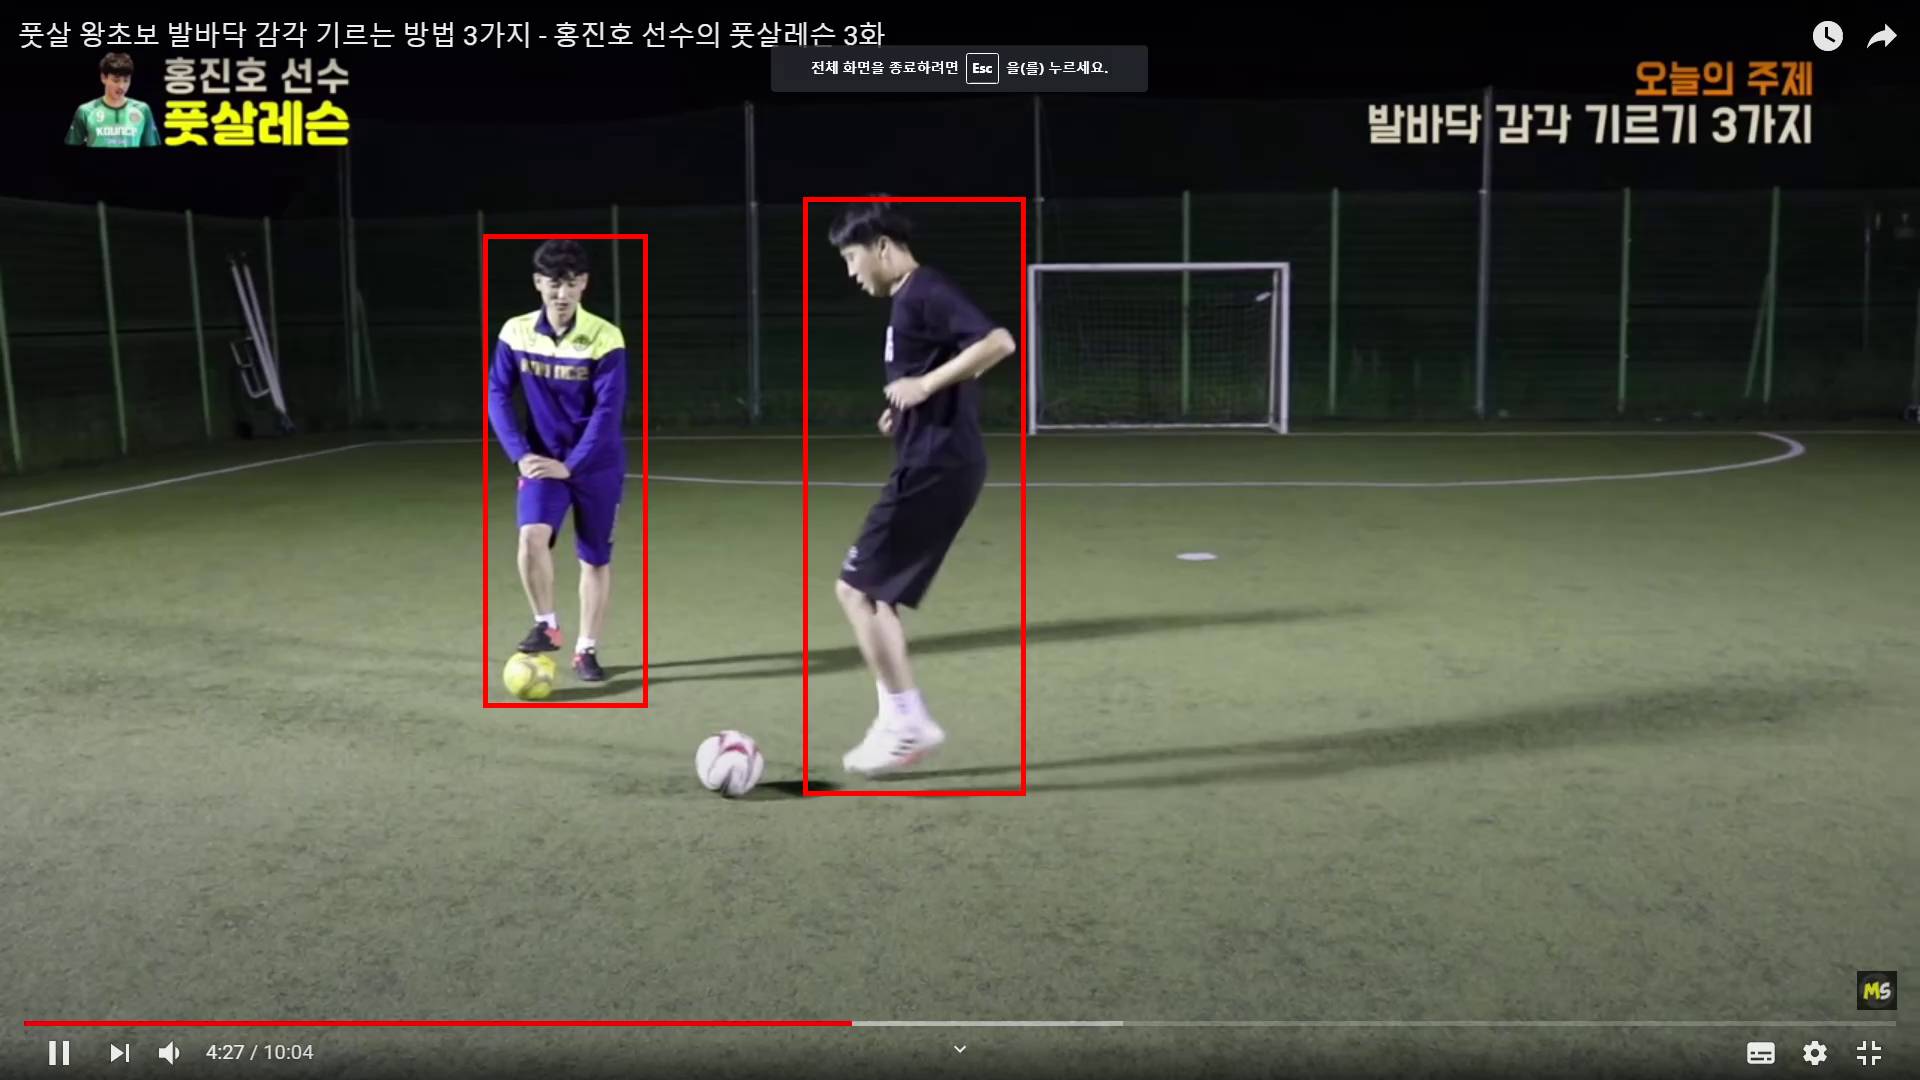

In [ ]:
x[0]

In [ ]:
# crop
x = []
crop_img = []
y = []

for i in range (len(df)):
  a = df.iloc[i]['x']
  b = df.iloc[i]['y']
  w = df.iloc[i]['w']
  h = df.iloc[i]['h']
  num = df.iloc[i]['frame']
  
  img = Image.fromarray(img_list[num])
  img = img.crop((a,b,a+w,b+h)).resize((164,473))

  img_np = np.array(img)
  crop_img.append(img_np)
  y.append(df.iloc[i]['id'])

y = np.array(y)
crop_img = np.array(crop_img)
crop_img.shape

(356, 473, 164, 3)

In [ ]:
crop_img.shape, y.shape

((356, 473, 164, 3), (356,))

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
x = crop_img
x_2d = crop_img.reshape(-1,164*473*3)
x.shape, x_2d.shape

((356, 473, 164, 3), (356, 232716))

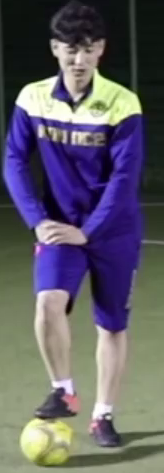

In [ ]:
Image.fromarray(x[0])

In [ ]:
model = SGDClassifier().fit(x_2d, y)
model.score(x_2d, y)

1.0

In [ ]:
model.predict(x_2d)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
from tensorflow import keras

In [ ]:
#CNN 구성하기

model = keras.Sequential()
model.add(keras.layers.Input(shape=(164, 473, 3))) #입력 3차원 이미지

model.add(keras.layers.Conv2D(30, kernel_size=(5, 5), padding='SAME', activation='relu'))#(5,5) 패치단위로 모양을 보겠다.
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='SAME'))

model.add(keras.layers.Conv2D(40, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='SAME'))

model.add(keras.layers.Conv2D(50, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='SAME'))

model.add(keras.layers.Conv2D(60, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='SAME'))

model.add(keras.layers.Conv2D(70, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='SAME'))

model.add(keras.layers.Flatten())# 4D > 2D 변환 
model.add(keras.layers.Dropout(0.2))# 10% 의 노드를 0으로 바꾸기
model.add(keras.layers.Dense(2, activation='softmax'))#클래스 수
loss = keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(x,y,epochs=100)

In [ ]:
model.evaluate(x,y)

12/12 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

# End
